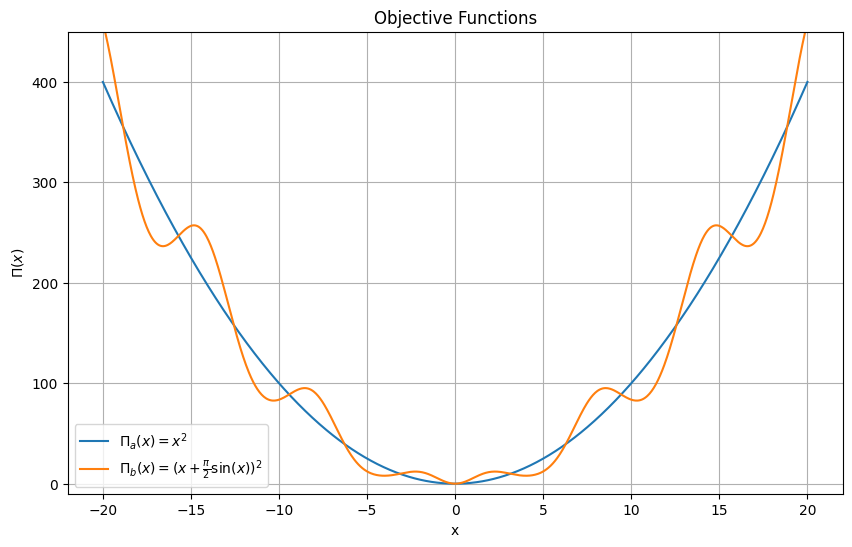

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.linspace(-20, 20, 1000)

# Define objective functions
def Pi_a(x):
    return x**2

def Pi_b(x):
    return (x + (np.pi / 2) * np.sin(x))**2

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, Pi_a(x), label=r'$\Pi_a(x) = x^2$')
plt.plot(x, Pi_b(x), label=r'$\Pi_b(x) = (x + \frac{\pi}{2}\sin(x))^2$')
plt.title('Objective Functions')
plt.xlabel('x')
plt.ylabel(r'$\Pi(x)$')
plt.grid(True)
plt.legend()
plt.ylim(-10, 450)
plt.show()

In [ ]:
import numpy as np

def myNewton(f, df, x0, TOL, maxit):
    """
    Performs Newton's method for optimization in one dimension.

    Args:
        f (function): The gradient of the objective function, Pi'(x).
        df (function): The Hessian of the objective function, Pi''(x).
        x0 (float): The initial guess.
        TOL (float): The tolerance for convergence.
        maxit (int): The maximum number of iterations.

    Returns:
        tuple: A tuple containing:
            - sol (float): The final value of x.
            - its (int): The number of iterations performed.
            - hist (np.ndarray): The history of x values.
    """
    x = float(x0)
    hist = [x]
    its = 0

    for i in range(maxit):
        fx = f(x)
        if abs(fx) < TOL:
            break

        dfx = df(x)
        if dfx == 0:
            print("Warning: Zero derivative encountered.")
            break

        x = x - fx / dfx
        hist.append(x)
        its = i + 1

    return x, its, np.array(hist)

<>:33: SyntaxWarning: invalid escape sequence '\P'
<>:45: SyntaxWarning: invalid escape sequence '\P'
<>:33: SyntaxWarning: invalid escape sequence '\P'
<>:45: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-2651304509.py:33: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel("f(x) = $\Pi'(x)$")
/tmp/ipython-input-2651304509.py:45: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel("df(x) = $\Pi''(x)$")


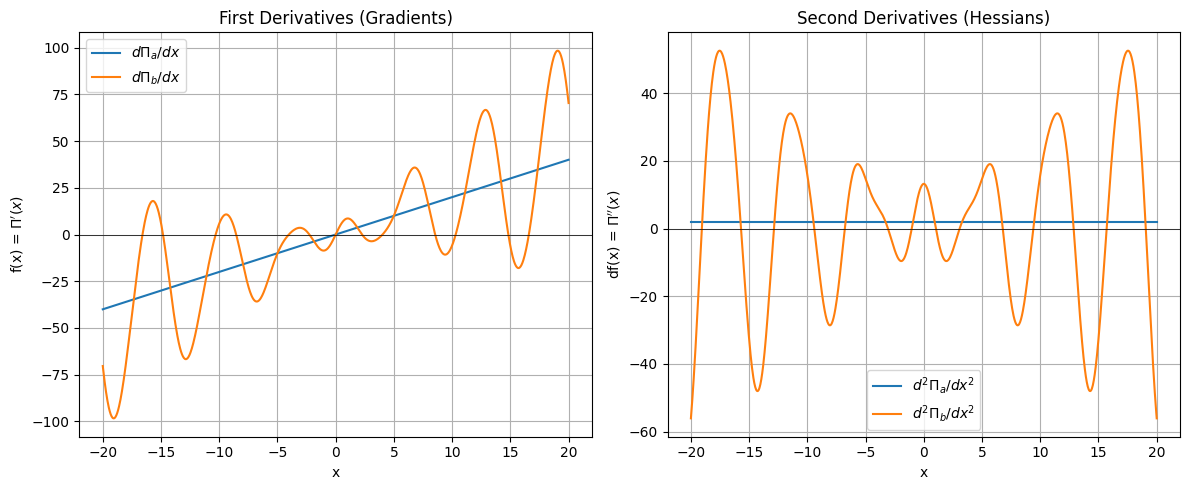

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Derivatives for Pi_a ---
def f_a(x):
    return 2 * x

def df_a(x):
    # This function needs to handle array inputs for plotting
    return np.full_like(x, 2, dtype=float) if isinstance(x, np.ndarray) else 2.0

# --- Derivatives for Pi_b ---
def f_b(x):
    return 2 * (x + (np.pi / 2) * np.sin(x)) * (1 + (np.pi / 2) * np.cos(x))

def df_b(x):
    term1 = 2
    term2 = 2 * np.pi * np.cos(x)
    term3 = -np.pi * x * np.sin(x)
    term4 = (np.pi**2 / 2) * np.cos(2*x)
    return term1 + term2 + term3 + term4

# --- Plotting ---
x_domain = np.linspace(-20, 20, 1000)

# Plot 1: First Derivatives
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_domain, f_a(x_domain), label=r'$d\Pi_a/dx$')
plt.plot(x_domain, f_b(x_domain), label=r'$d\Pi_b/dx$')
plt.title('First Derivatives (Gradients)')
plt.xlabel('x')
plt.ylabel("f(x) = $\Pi'(x)$")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)


# Plot 2: Second Derivatives
plt.subplot(1, 2, 2)
plt.plot(x_domain, df_a(x_domain), label=r'$d^2\Pi_a/dx^2$')
plt.plot(x_domain, df_b(x_domain), label=r'$d^2\Pi_b/dx^2$')
plt.title('Second Derivatives (Hessians)')
plt.xlabel('x')
plt.ylabel("df(x) = $\Pi''(x)$")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

# New section

<>:33: SyntaxWarning: invalid escape sequence '\P'
<>:40: SyntaxWarning: invalid escape sequence '\P'
<>:46: SyntaxWarning: invalid escape sequence '\P'
<>:53: SyntaxWarning: invalid escape sequence '\P'
<>:33: SyntaxWarning: invalid escape sequence '\P'
<>:40: SyntaxWarning: invalid escape sequence '\P'
<>:46: SyntaxWarning: invalid escape sequence '\P'
<>:53: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-3850156596.py:33: SyntaxWarning: invalid escape sequence '\P'
  ax1.set_title('Convergence for $\Pi_a(x)$')
/tmp/ipython-input-3850156596.py:40: SyntaxWarning: invalid escape sequence '\P'
  ax1.set_ylabel('Objective Value $\Pi_a(x)$')
/tmp/ipython-input-3850156596.py:46: SyntaxWarning: invalid escape sequence '\P'
  ax2.set_title('Convergence for $\Pi_b(x)$')
/tmp/ipython-input-3850156596.py:53: SyntaxWarning: invalid escape sequence '\P'
  ax2.set_ylabel('Objective Value $\Pi_b(x)$')


Function | x0    | Iterations   | Final Solution (x)  
-------------------------------------------------------
Pi_a     | 0.2   | 1            | 0.0000000000        
Pi_b     | 0.2   | 3            | -0.0000000000       
Pi_a     | 2.0   | 1            | 0.0000000000        
Pi_b     | 2.0   | 4            | 2.2609034182        
Pi_a     | 20.0  | 1            | 0.0000000000        
Pi_b     | 20.0  | 5            | 21.1104593397       


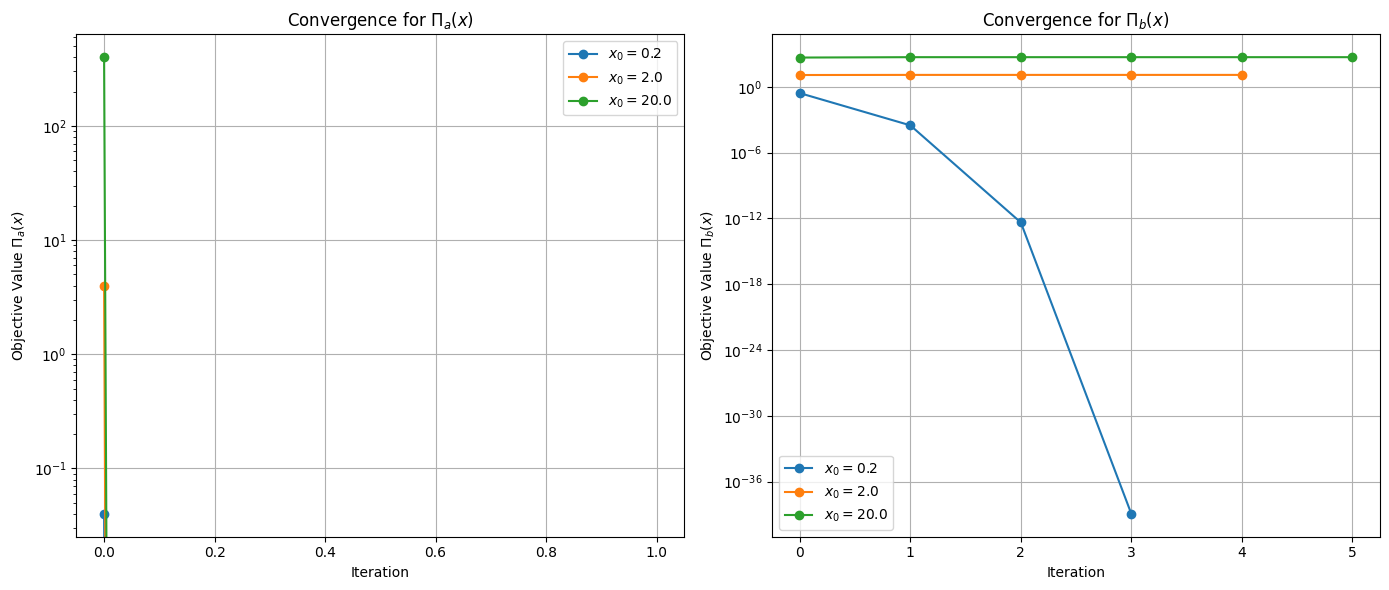

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
TOL = 1e-8
maxit = 20
x0s = [0.2, 2.0, 20.0]

# --- Run Newton's Method and store results ---
results = {}
for x0 in x0s:
    # Minimize Pi_a
    sol_a, its_a, hist_a = myNewton(f_a, df_a, x0, TOL, maxit)
    results[f'Pi_a, x0={x0}'] = {'sol': sol_a, 'its': its_a, 'hist': hist_a}

    # Minimize Pi_b
    sol_b, its_b, hist_b = myNewton(f_b, df_b, x0, TOL, maxit)
    results[f'Pi_b, x0={x0}'] = {'sol': sol_b, 'its': its_b, 'hist': hist_b}

# --- Print Results Table ---
print(f"{'Function':<8} | {'x0':<5} | {'Iterations':<12} | {'Final Solution (x)':<20}")
print("-" * 55)
for key, value in results.items():
    func_name, x0_str = key.split(', ')
    x0_val = float(x0_str.split('=')[1])
    print(f"{func_name:<8} | {x0_val:<5.1f} | {value['its']:<12} | {value['sol']:<20.10f}")


# --- Plotting Convergence History ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Pi_a
ax1.set_title('Convergence for $\Pi_a(x)$')
for x0 in x0s:
    res = results[f'Pi_a, x0={x0}']
    hist = res['hist']
    iterations = np.arange(len(hist))
    ax1.plot(iterations, Pi_a(hist), 'o-', label=f'$x_0={x0}$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective Value $\Pi_a(x)$')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True)

# Plot for Pi_b
ax2.set_title('Convergence for $\Pi_b(x)$')
for x0 in x0s:
    res = results[f'Pi_b, x0={x0}']
    hist = res['hist']
    iterations = np.arange(len(hist))
    ax2.plot(iterations, Pi_b(hist), 'o-', label=f'$x_0={x0}$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Objective Value $\Pi_b(x)$')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def genetic_algorithm(cost_func, S, P, K, G, dv, lim, TOL):
    """
    Implements a genetic algorithm for function minimization.

    Args:
        cost_func (function): The objective function to minimize.
        S (int): Population size per generation.
        P (int): Number of parents to preserve (must be even).
        K (int): Number of offspring to create.
        G (int): Maximum number of generations.
        dv (int): Number of design variables.
        lim (np.ndarray): A (dv x 2) array of lower and upper bounds.
        TOL (float): Cost tolerance to stop evolution.

    Returns:
        tuple: A tuple containing:
            - Pi (np.ndarray): (g x S) array of costs.
            - Pi_min (np.ndarray): (g,) array of minimum costs.
            - Pi_avg (np.ndarray): (g,) array of average costs.
            - Lambda (np.ndarray): (S x dv) array of the final population.
            - generations_run (int): The number of generations actually run.
    """
    # Initialize arrays to store results
    Pi = np.zeros((G, S))
    Pi_min = np.zeros(G)
    Pi_avg = np.zeros(G)

    # 1. Initialization: Create initial random population
    lower_bound, upper_bound = lim[0, 0], lim[0, 1]
    Lambda = np.random.uniform(lower_bound, upper_bound, size=(S, dv))

    for g in range(G):
        # 2. Evaluation: Calculate cost for each design
        costs = np.array([cost_func(individual[0]) for individual in Lambda])

        # 3. Ranking: Sort population by cost (lowest first)
        sorted_indices = np.argsort(costs)
        Lambda = Lambda[sorted_indices]
        costs = costs[sorted_indices]

        # 4. Record Statistics
        Pi[g, :] = costs
        Pi_min[g] = costs[0]
        Pi_avg[g] = np.mean(costs)

        # 5. Termination Check
        if Pi_min[g] <= TOL:
            print(f"Termination criteria met at generation {g+1}.")
            # Trim unused portions of arrays before returning
            return Pi[:g+1], Pi_min[:g+1], Pi_avg[:g+1], Lambda, g + 1

        # 6. Selection: Preserve top P parents
        parents = Lambda[:P, :]

        # 7. Breeding: Create K offspring from P parents
        offspring = np.zeros((K, dv))
        num_pairs = P // 2
        # Ensure K matches the number of offspring we can create
        if K != P:
            print("Warning: K is not equal to P. Adjusting K to P for this breeding scheme.")
            K = P

        offspring_idx = 0
        for i in range(0, P, 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            # Arithmetic crossover to create two children
            child1 = 0.75 * parent1 + 0.25 * parent2
            child2 = 0.25 * parent1 + 0.75 * parent2
            offspring[offspring_idx] = child1
            offspring[offspring_idx+1] = child2
            offspring_idx += 2

        # 8. Create New Population
        num_random = S - P - K
        random_designs = np.random.uniform(lower_bound, upper_bound, size=(num_random, dv))

        Lambda = np.vstack((parents, offspring, random_designs))

    print("Maximum generations reached.")
    return Pi, Pi_min, Pi_avg, Lambda, G

# --- Debugging on Pi_a(x) = x^2 ---
def Pi_a(x):
    return x**2

# GA Parameters from prompt
S, P, K, G = 50, 12, 12, 100
dv = 1
lim = np.array([[-20, 20]])
TOL = 1e-6

print("--- Debugging GA on Pi_a(x) = x^2 ---")
_, pi_min_a, _, final_pop_a, gens_a = genetic_algorithm(Pi_a, S, P, K, G, dv, lim, TOL)

print(f"\nGenerations run: {gens_a}")
print(f"Minimum cost found: {pi_min_a[-1]:.2e}")
print(f"Best design found: x = {final_pop_a[0, 0]:.4f}")

--- Debugging GA on Pi_a(x) = x^2 ---
Termination criteria met at generation 35.

Generations run: 35
Minimum cost found: 8.17e-07
Best design found: x = -0.0009


<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-2118264484.py:15: SyntaxWarning: invalid escape sequence '\P'
  plt.title('GA Performance on Non-Convex Function $\Pi_b(x)$')



--- Minimizing Pi_b(x) ---
Termination criteria met at generation 10.

Generations run: 10
Minimum cost found: 7.42e-07
Best design found: x = -0.0003


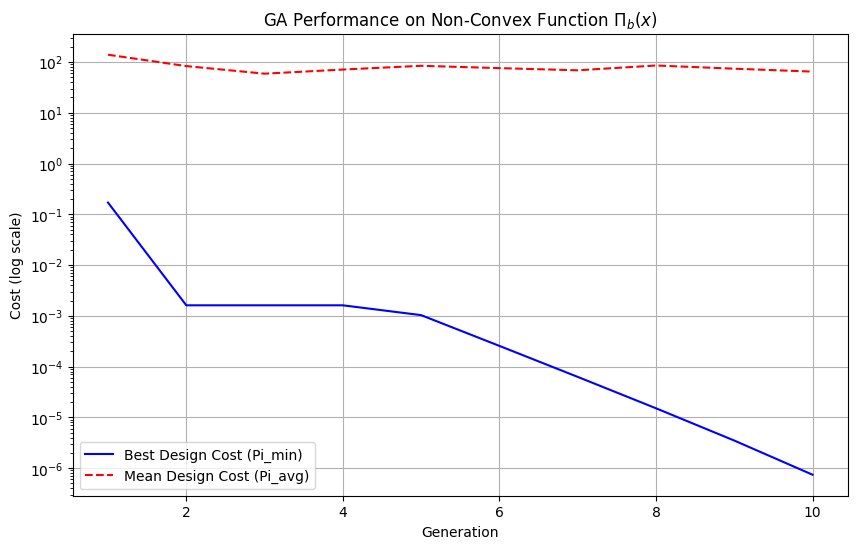

In [ ]:
def Pi_b(x):
    return (x + (np.pi / 2) * np.sin(x))**2

print("\n--- Minimizing Pi_b(x) ---")
_, pi_min_b, pi_avg_b, final_pop_b, gens_b = genetic_algorithm(Pi_b, S, P, K, G, dv, lim, TOL)

print(f"\nGenerations run: {gens_b}")
print(f"Minimum cost found: {pi_min_b[-1]:.2e}")
print(f"Best design found: x = {final_pop_b[0, 0]:.4f}")

# Plotting the results on a semilog scale
plt.figure(figsize=(10, 6))
plt.semilogy(range(1, gens_b + 1), pi_min_b, 'b-', label='Best Design Cost (Pi_min)')
plt.semilogy(range(1, gens_b + 1), pi_avg_b, 'r--', label='Mean Design Cost (Pi_avg)')
plt.title('GA Performance on Non-Convex Function $\Pi_b(x)$')
plt.xlabel('Generation')
plt.ylabel('Cost (log scale)')
plt.legend()
plt.grid(True)
plt.show()